<a href="https://colab.research.google.com/github/robertoalotufo/ia898/blob/master/src/conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Function conv

## Synopse

2D or 3D linear discrete convolution.

- **g = conv(f, h)**

  - **g**: Image, dtype = float64

  - **f**: Image. input image.
  - **h**: Image. PSF (point spread function), or kernel. The origin is at the array origin.

In [ ]:
import numpy as np

def conv(f, h):
    f, h = np.asarray(f), np.asarray(h,float)
    if len(f.shape) == 1: f = f[np.newaxis,:]
    if len(h.shape) == 1: h = h[np.newaxis,:]
    if f.size < h.size:
        f, h = h, f
    g = np.zeros(np.array(f.shape) + np.array(h.shape) - 1)
    if f.ndim == 2:
        H,W = f.shape
        for (r,c) in np.transpose(np.nonzero(h)):
            g[r:r+H, c:c+W] += f * h[r,c]

    if f.ndim == 3:
        D,H,W = f.shape
        for (d,r,c) in np.transpose(np.nonzero(h)):
            g[d:d+D, r:r+H, c:c+W] += f * h[d,r,c]

    return g

## Description

Perform a 2D or 3D discrete linear convolution.
The resultant image dimensions are the sum of the input image dimensions minus 1 in each dimension.

## Examples

In [ ]:
testing = (__name__ == "__main__")
if testing:
    ! jupyter nbconvert --to python conv.ipynb
    import numpy as np
    import sys,os
    ia898path = os.path.abspath('../../')
    if ia898path not in sys.path:
        sys.path.append(ia898path)
    import ia898.src as ia

[NbConvertApp] Converting notebook conv.ipynb to python
[NbConvertApp] Writing 3605 bytes to conv.py


### Example 1

In [ ]:
if testing:    
    f = np.zeros((5,5))
    f[2,2] = 1
    print('f:\n', f)
    h = np.array([[1,2,3],
                  [4,5,6]])
    print('h=\n',h)
    a1 = ia.conv(f,h)
    print('a1.dtype',a1.dtype)
    print('a1=f*h:\n',a1)
    a2 = ia.conv(h,f)
    print('a2=h*f:\n',a2)

f:
 [[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
h=
 [[1 2 3]
 [4 5 6]]
a1.dtype float64
a1=f*h:
 [[ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  2.  3.  0.  0.]
 [ 0.  0.  4.  5.  6.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]]
a2=h*f:
 [[ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  2.  3.  0.  0.]
 [ 0.  0.  4.  5.  6.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]]


### Example 2

In [ ]:
if testing:
    f = np.array([[1,0,0,0],
                  [0,0,0,0]])
    print(f)
    h = np.array([1,2,3])
    print(h)
    a = ia.conv(f,h)
    print(a)

[[1 0 0 0]
 [0 0 0 0]]
[1 2 3]
[[ 1.  2.  3.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]


### Example 3

In [ ]:
if testing:
    f = np.array([[1,0,0,0,0,0],
                  [0,0,0,0,0,0]])
    print(f)
    h = np.array([1,2,3,4])
    print(h)
    a = ia.conv(f,h)
    print(a)

[[1 0 0 0 0 0]
 [0 0 0 0 0 0]]
[1 2 3 4]
[[ 1.  2.  3.  4.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]]


### Example 4


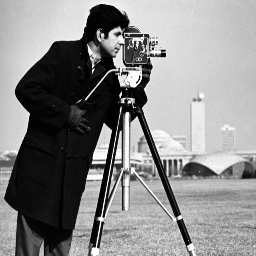


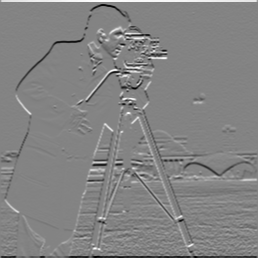

In [ ]:
if testing:
    %matplotlib inline
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg

    f = mpimg.imread('../data/cameraman.tif')
    h = np.array([[ 1, 2, 1],
                  [ 0, 0, 0],
                  [-1,-2,-1]])
    g = ia.conv(f,h)
    gn = ia.normalize(g, [0,255])
    ia.adshow(f,title='input')
    ia.adshow(gn,title='filtered')

## Limitations

Both image and kernel are internally converted to double.

## Equation

$$ \begin{matrix}
    (f \ast h)(r,c) &=&  \sum_{i=0}^{H-1} \sum_{j=0}^{W-1} f_{e}(i,j) h_{e}(r-i, c-j) \\
    f_{e}(r,c) &=& \left\{ \begin{array}{llcl} f(r,c), & 0 \leq r \leq H_{f}-1 & and & 0 \leq r \leq W_f-1  \\
                                                         0, & H_f \leq r \leq H-1 & or & W_f \leq c \leq W-1 \end{array}\right.\\
    h_{e}(r,c) &=& \left\{ \begin{array}{llcl} f(r,c), & 0 \leq r \leq H_{h}-1 & and & 0 \leq r \leq W_h-1  \\
                                                         0, & H_h \leq r \leq H-1 & or & W_h \leq c \leq W-1 \end{array}\right.\\
    H & \geq & H_f + H_h - 1 \\
    W & \geq & W_f + W_h - 1
    \end{matrix} $$
    

## See Also

- [pconv.ipynb](pconv.ipynb)  - 2D Periodic convolution (kernel origin at array origin).

In [ ]:
if testing:
    print('testing conv')
    print(repr(ia.conv(np.array([[1,0,1,0],[0,0,0,0]]), np.array([1,2,3]))) == repr(np.array(
          [[1., 2., 4., 2., 3., 0.],
           [0., 0., 0., 0., 0., 0.]])))

testing conv
True
